In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image
from ultralytics import YOLO
from src.DIBA import *
from src.models import *
from utils.utils import postprocess_detections_yolo

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [4]:
# initialize faster model 
metric_YOLO = YOLO_DIBA()
metric_YOLO = metric_YOLO.to(device)

# initialize faster model 
core_YOLO = YOLO_DIBA(conf_t = 0)
core_YOLO = core_YOLO.to(device)


In [5]:
core = YOLO('yolo11n.pt')
core = core.eval()

In [6]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((640,640)),
                            torchvision.transforms.ToTensor()])

# dset = torchvision.datasets.VOCDetection(root='~/Downloads', image_set='val', download=False, transform=transform)

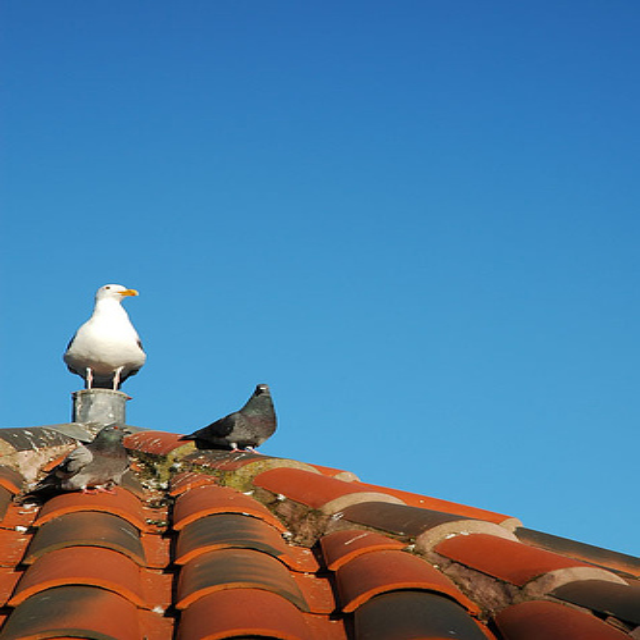

In [8]:
# img1 = dset[85][0]
# img1 = dset[83][0]
img_pil = Image.open('./img/demo_img2.png')
img1 = transform(img_pil)
x1 = img1[None,...].to(device)

torchvision.transforms.functional.to_pil_image(img1)

In [9]:
model = core.model
pred = model(x1)
# pred = core.model(x1)

In [8]:
# img_bx = torchvision.utils.draw_bounding_boxes(torch.squeeze(x1.detach().cpu()), boxes=pred[0]['boxes'], colors='red')
# torchvision.transforms.functional.to_pil_image(img_bx)

In [10]:
scale_shape = 640
k = 3*scale_shape*scale_shape
gamma = 1e4/k
beta = 1e4/k
sigma = 1e4/k

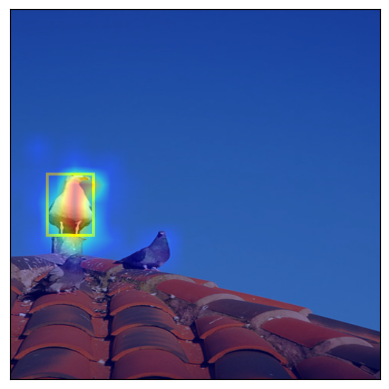

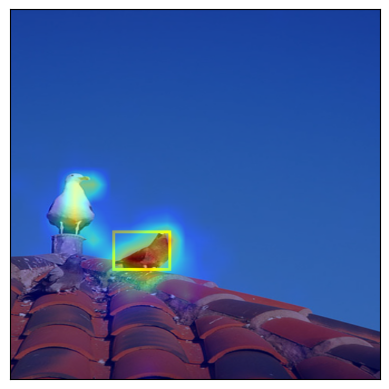

In [11]:
train_bottleneck(model = core_YOLO, metric_model = metric_YOLO, img = x1, gamma = gamma, sigma = sigma, beta = beta, scale_shape=scale_shape, epochs=20, run_metrics=False)
# metrics = train_bottleneck(model = core_YOLO, metric_model = metric_YOLO, img = x1, gamma = gamma, sigma = sigma, beta = beta, scale_shape=scale_shape, epochs=20, run_metrics=True)